The Sparks Foundation-Graduate Rotational Internship Program

Name: Mihir Jagdish Gaikwad

Domain: Data Science and Business Analytics.

Task 6: Create the Decision Tree classifier and visualize it graphically.

Purpose: The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

Level: Intermediate

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Reading the Dataset
from google.colab import drive 
drive.mount('/content/gdrive')

#Headlines data
file_path = 'gdrive/My Drive/Iris.csv'
df1 = pd.read_csv(file_path,  engine='python')
df1.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
# Information about the Dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


The above data shows us that there are No Null values in the Dataset.

In [21]:
# Satistical Information about the Dataset

# Only Numerical Columns get included.

df1.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [28]:
# Putting feature variable to X 

X=df1.drop(['Species','Id'],axis=1)

# Putting Response variable to y

Y=df1['Species']

In [23]:
# Library for Train-Test Split

from sklearn.model_selection import train_test_split

In [29]:
# Doing the Train-Test Split
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.5,random_state=42)
X_train.shape,X_test.shape

((75, 4), (75, 4))

A.) Decision Tree without any Hyperparameter Tuning

In [30]:
# Fitting the Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

#Instantiating the Fit

dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
# Importing the Required Packages for VIsualization of DT's

from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

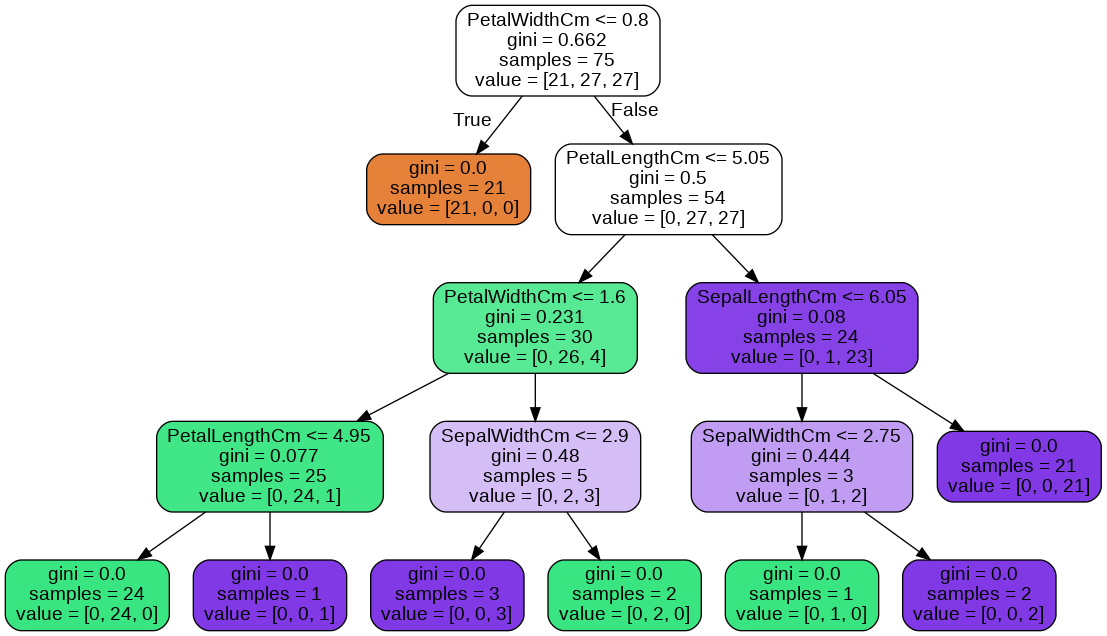

In [32]:
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [33]:
# Evaluating Model Performance

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [35]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

1.0


array([[21,  0,  0],
       [ 0, 27,  0],
       [ 0,  0, 27]])

In [36]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.9466666666666667


array([[29,  0,  0],
       [ 0, 23,  0],
       [ 0,  4, 19]])

For the Above model we can see that if we don't provide any kind of parameters such as:

1) Depth of the Tree

2) Minimum Samples Split

3) Minimum Samples at Leaf Node

4) Criterion-Gini Index or Entropy

The Model seems to overfit on the Training data by memorizing all the data points and has become more complex by having a high variance and a low bias.

In [37]:
#Standard Code to display the Train and Test Accuracy together.
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

B.) Using GridSearch CV technique for Hyperparameter tuning

In [38]:
dt=DecisionTreeClassifier(random_state=42)

In [39]:
# Importing The Necessary Library
from sklearn.model_selection import GridSearchCV

In [40]:
params={
        'max_depth':[2,3,5,10],
        'min_samples_leaf':[5,10,20,50],
        'min_samples_split':[10,20,30,40],
        'criterion':['gini','entropy']
}

In [41]:
grid_search=GridSearchCV(estimator=dt,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring='accuracy')

In [42]:
# Instantiating the Fit
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 128 candidates, totalling 512 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 432 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 512 out of 512 | elapsed:    2.9s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                       

So, here we have got around 96 fits because:
CV=4

1) Max_depth Params=4

2) Min_samples_leaf params=4

3) Min_samples_split=4

4) Critierion=2

This implies 4 4 4 4 2=512 fits

In [43]:
# Each Row Here reresents the Different combinations we tried.
cv_data=pd.DataFrame(grid_search.cv_results_)
cv_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003336,0.000394,0.001704,0.000191,gini,2,5,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.789474,0.894737,0.947368,0.833333,0.866228,0.059937,1
1,0.007244,0.003678,0.001369,0.000041,gini,2,5,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.789474,0.894737,0.947368,0.833333,0.866228,0.059937,1
2,0.003761,0.001483,0.001426,0.000058,gini,2,5,30,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.789474,0.894737,0.947368,0.833333,0.866228,0.059937,1
3,0.003222,0.000663,0.001363,0.000023,gini,2,5,40,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.526316,0.894737,0.947368,0.833333,0.800439,0.163329,57
4,0.003018,0.000124,0.001365,0.000057,gini,2,10,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.789474,0.894737,0.947368,0.833333,0.866228,0.059937,1


In [44]:
# Shape of the set
cv_data.shape

(128, 16)

In [45]:
grid_search.best_score_

0.8662280701754386

In [46]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [48]:
dt_best=grid_search.best_estimator_

In [49]:
evaluate_model(dt_best)

Train Accuracy : 0.9333333333333333
Train Confusion Matrix:
[[21  0  0]
 [ 0 26  1]
 [ 0  4 23]]
--------------------------------------------------
Test Accuracy : 0.9333333333333333
Test Confusion Matrix:
[[29  0  0]
 [ 0 23  0]
 [ 0  5 18]]


The Above Dataset has given us a Model were we have achieved a good accuracy of 0.93 on both Train and Test set.

1) This why it is important to tune our model by providing some hyperparameters in it.

2) Since, the no. of data points available to us in this dataset our limited that is why it is important to select the train test data split carefully.

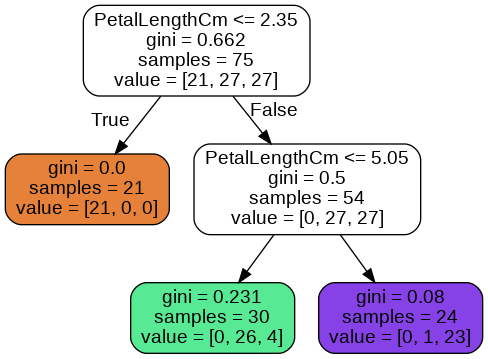

In [50]:
# Decision Tree for our Best Model
dot_data = StringIO()  

export_graphviz(dt_best, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

1) This Tree is having a Max depth of 2

2) Minimum Samples at Leaf Node are 5.

3) Minimum Samples Required to split the Node are 10.